In [94]:
#import required libraries 
%matplotlib inline
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt 
import glob 
import os

In [95]:
#setting a search criteria for all tiff files that we want to use 
dirpath = '..//Real_world_examples/LCCSlayer/coherence'
outfp= '..//Real_world_examples/LCCSlayer/coherence/mosaic.tif'
#Search criteria
search_criteria = "*_velocity.tif"
q = os.path.join(dirpath,search_criteria)
print(q)

..//Real_world_examples/LCCSlayer/coherence/*_velocity.tif


In [96]:
#listing all the files with searching criteria 
velocity_ftp = glob.glob(q)
velocity_ftp

['..//Real_world_examples/LCCSlayer/coherence/SYDNEY_velocity.tif',
 '..//Real_world_examples/LCCSlayer/coherence/ORANGE_velocity.tif']

In [97]:
#create an empty list for all datafiles that is going to be part of mosaic 
velocity_src_files = []

In [98]:
for fp in velocity_ftp:
    src = rasterio.open(fp)
    velocity_src_files.append(src)
velocity_src_files

[<open DatasetReader name='..//Real_world_examples/LCCSlayer/coherence/SYDNEY_velocity.tif' mode='r'>,
 <open DatasetReader name='..//Real_world_examples/LCCSlayer/coherence/ORANGE_velocity.tif' mode='r'>]

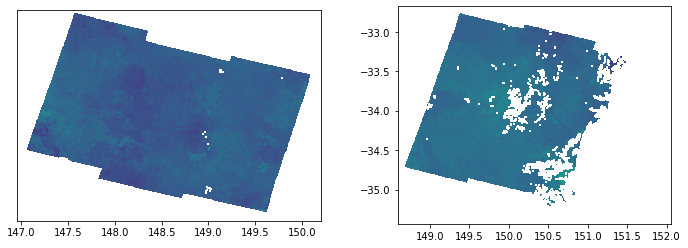

In [101]:
#create four plots next to each other 
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot first four files
show(velocity_src_files[1], ax=ax1)
show(velocity_src_files[0], ax=ax2)

# Do not show y-ticks values in last three axis
for ax in [ax1]:
    ax.yaxis.set_visible(False)

In [102]:
#merge function returns a single mosaic array and the transformation info 
mosaic,out_trans = merge(velocity_src_files)

In [103]:
out_trans

Affine(0.0055555556, 0.0, 146.95208351111,
       0.0, -0.0055555556, -32.02513911111)

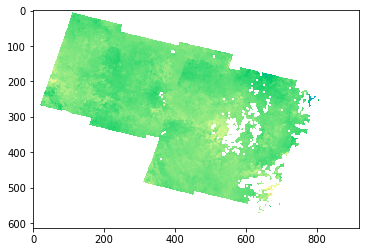

In [104]:
show(mosaic, cmap='terrain')

In [105]:
#Copy and update the metadata 
out_meta = src.meta.copy()
out_meta.update({"driver":"GTiff",
                 "height":mosaic.shape[1],
                 "width":mosaic.shape[2],
                 "transform":out_trans})

In [108]:
#Saving the mosaic file out 
with rasterio.open(outfp,"w",**out_meta) as dest:
    dest.write(mosaic)